                                                          Бояринцев Дмитрий Федорович

# Лабораторная работа 9

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad # для интеграла
from scipy.optimize import minimize_scalar # для точки минимума

## Библиотека Scipy. Потоки

**1.** Выберите 3 разные функции (например, парабола, гипербола, прямая, коэффициенты подберите самостоятельно). Изобразите их графики на одной координатной плоскости разными цветами (добавьте легенду). Пользователь вводит номер функции и интересующий его интервал, программа отдельно отображает выбранную функцию на данном интервале и находит точку минимума функции на данном интервале. Кроме того, программа выводит значение интеграла функции между двумя введенными точками.

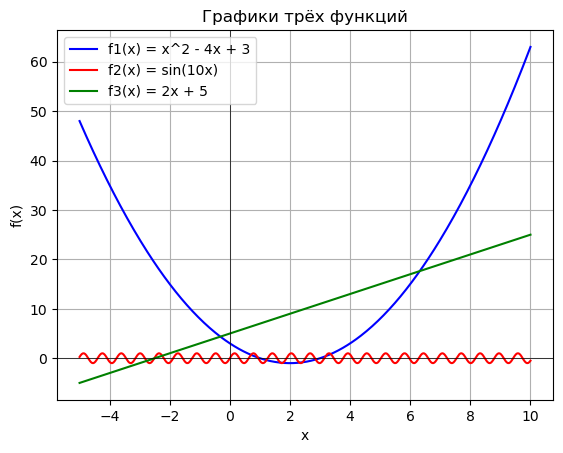

Выберите номер функции:
1 - Парабола (x^2 - 4x + 3)
2 - Синусоида (sin(10x))
3 - Прямая (2x + 5)


Введите номер функции (1, 2 или 3):  прт


Ошибка ввода. Пожалуйста, введите корректное int значение.


Введите номер функции (1, 2 или 3):  2
Введите начало интервала:  -6
Введите конец интервала (должно быть больше начала):  -54


Конец интервала должен быть больше начала.


Введите конец интервала:  -1


Точка минимума на интервале [-6.0, -1.0]: x = -3.93, f(x) = -1.00
Значение интеграла функции на интервале [-6.0, -1.0]: -0.01


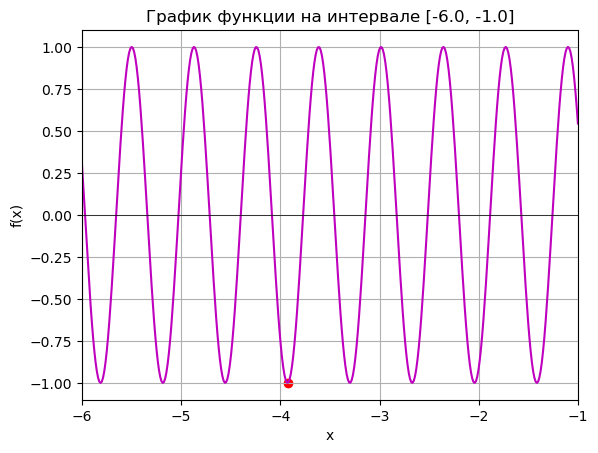

In [34]:
# Парабола
def func1(x):
    return x**2 - 4*x + 3  

# Синусоида
def func2(x):
    return np.sin(10*x) 

# Прямая
def func3(x):
    return 2*x + 5  

# Отрисовка одного графика на выбранном промежутке, нахождение точки минимума и интегралла
def plot_and_analyze(func, a, b):
    # Точка минимума
    res = minimize_scalar(func, bounds=(a, b), method='bounded')
    x_min = res.x
    y_min = res.fun
    print(f"Точка минимума на интервале [{a}, {b}]: x = {x_min:.2f}, f(x) = {y_min:.2f}")

    # Интеграл функции на данном промежутке
    integral, _ = quad(func, a, b)
    print(f"Значение интеграла функции на интервале [{a}, {b}]: {integral:.2f}")
    
    # построение графика
    x_range = np.linspace(a, b, 400)
    plt.plot(x_range, func(x_range), label=f"f(x) на интервале [{a}, {b}]", color='m')
    plt.scatter(x_min, y_min, color='r')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.title(f"График функции на интервале [{a}, {b}]")
    plt.xlim(a, b)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.show()

# Валидация данных с клавиатуры
def get_valid_input(prompt, input_type=float, valid_range=None):
    while True:
        try:
            value = input_type(input(prompt))
            if valid_range and (value < valid_range[0] or value > valid_range[1]):
                raise ValueError
            return value
        except ValueError:
            print(f"Ошибка ввода. Пожалуйста, введите корректное {input_type.__name__} значение.")

def main():
    # промежуток по x, 400 точек
    x = np.linspace(-5, 10, 400)

    # графики всех функций
    plt.plot(x, func1(x), label='f1(x) = x^2 - 4x + 3', color='b')
    plt.plot(x, func2(x), label='f2(x) = sin(10x)', color='r')
    plt.plot(x, func3(x), label='f3(x) = 2x + 5', color='g')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)

    plt.title("Графики трёх функций")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # словарь с функциями
    funcs = {1: func1, 2: func2, 3: func3}

    print("Выберите номер функции:")
    print("1 - Парабола (x^2 - 4x + 3)")
    print("2 - Синусоида (sin(10x))")
    print("3 - Прямая (2x + 5)")

    # ввод данных с клавиатуры
    num_func = get_valid_input("Введите номер функции (1, 2 или 3): ", int, valid_range=(1, 3))
    a = get_valid_input("Введите начало интервала: ", float)
    b = get_valid_input("Введите конец интервала (должно быть больше начала): ", float)

    while b <= a:
        print("Конец интервала должен быть больше начала.")
        b = get_valid_input("Введите конец интервала: ", float)

    # Отрисовка одной функции
    plot_and_analyze(funcs[num_func], a, b)

if __name__=="__main__":
    main()

**2.** Написать программу, которая вычисляет факториал числа 100 000 и показывает, сколько времени ушло на решение этой задачи. Сначала требуется решить задачу с использованием одного потока, затем с двумя, четырьмя, восьмью. При использовании двух потоков один поток перемножает числа от 1 до 50 000, а второй – от 50 001 до 100 000, а затем результаты перемножаются (можно поэкспериментировать с разделением работы на две части, не обязательно делить интервал пополам, деление осуществлять автоматически). Сравните результаты вычисления факториала (нужно, чтобы результаты совпадали) и время вычисления при каждом способе.

In [13]:
import threading
import time
import sys

In [21]:
# для выводы больших чисел
sys.set_int_max_str_digits(10_000_000)

# подсчёт части факторила от start до end
def partial_factorial(start, end, result, index):
    temp_result = 1
    for i in range(start, end + 1):
        temp_result *= i
    result[index] = temp_result

# деление работы на потоки равными частями
def factorial_multithreaded_threading(n, num_threads):
    step = n // num_threads # количества чисел для перемножения один потоком
    threads = []
    result = [1] * num_threads
    
    # для каждого потока
    for i in range(num_threads):
        start = i * step + 1
        end = (i + 1) * step if i != num_threads - 1 else n
        thread = threading.Thread(target=partial_factorial, args=(start, end, result, i,))
        threads.append(thread)
        thread.start()

    # дожидаемся завершения работы всех потоков
    for thread in threads:
        thread.join()

    # перемножаем части факторила
    total_result = 1
    for r in result:
        total_result *= r
    
    return total_result

# однопоточная функция для нахождения факторила
def factorial_single_threaded(n):
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

# подсчёт времени для работы потоков
def measure_time(func, *args):
    start_time = time.time()
    result = func(*args) # нахождение факторила
    elapsed_time = time.time() - start_time
    return result, elapsed_time

def main():
    n = 100_000

    print("Однопоточное вычисление...")
    result, elapsed_time = measure_time(factorial_single_threaded, n)
    print(f"Время выполнения: {elapsed_time:.4f} секунд")
    #print(f"Результат {result}")

    for num_threads in [2, 4, 8]:
        print(f"\nМногопоточное вычисление с {num_threads} потоками...")
        result, elapsed_time = measure_time(factorial_multithreaded_threading, n, num_threads)
        print(f"Время выполнения: {elapsed_time:.4f} секунд")
        #print(f"Результат {result}")

if __name__ == "__main__":
    main()


Однопоточное вычисление...
Время выполнения: 4.8099 секунд

Многопоточное вычисление с 2 потоками...
Время выполнения: 2.6256 секунд

Многопоточное вычисление с 4 потоками...
Время выполнения: 1.5006 секунд

Многопоточное вычисление с 8 потоками...
Время выполнения: 0.8195 секунд


**3.** Написать многопоточную программу, в которой каждый из двух потоков записывает в файл свой номер (1 или 2) 100 000 раз. Файл для обоих потоков один и тот же. Не допускается, чтобы сначала запись выполнял один поток полностью, а потом второй. Автоматически проверить, реально ли в результате в файле записано 100 000 единиц и 100 000 двоек.

In [22]:
file_path = "output.txt"
num_writes = 100_000

# Объект блокировки для синхронизации потоков
lock = threading.Lock()

# Функция для каждого потока
def write_to_file(number):
    global lock
    for _ in range(num_writes):
        with lock: # захватываем объект блокировки
            with open(file_path, "a") as f: 
                f.write(f"{number}")  # пишем одну единицу или двойку

# Проверка результата
def validate_file():
    with open(file_path, "r") as f:
        content = f.read()

    ones = content.count("1")
    twos = content.count("2")

    if ones == num_writes and twos == num_writes:
        print("Файл корректен: 100 000 единиц и 100 000 двоек.")
    else:
        print(f"Ошибка: найдено {ones} единиц и {twos} двоек.")

def main():
    # Очистка файла перед записью
    open(file_path, "w").close()

    thread1 = threading.Thread(target=write_to_file, args=(1,))
    thread2 = threading.Thread(target=write_to_file, args=(2,))

    thread1.start()
    thread2.start()

    thread1.join()
    thread2.join()

    # Валидация данных в файле
    validate_file()

if __name__ == "__main__":
    main()


Файл корректен: 100 000 единиц и 100 000 двоек.
